## Steps for ML Model

1. Read the dataset
2. Exploratory Data Analysis
    * Initial Inspection
    * Visualization
3. Preprocess the Data
    * Missing Values
    * Feature Scaling
    * Label Encoding
    * Feature Selection / Feature Extraction
4. Split into Train and Test
5. Build the Model
6. Train the Data / Learn from Data
7. Test and Evaluate the Model
8. Use the model for predicting future

### Importing Libaries and Read the Dataset

In [1]:
import pandas as pd
df=pd.read_csv("Housing.csv")
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


### Checking for the varaible types 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    object 
 7   recroom     546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gashw       546 non-null    object 
 10  airco       546 non-null    object 
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB


### Checking for Null Values

In [3]:
df.isna().sum()

Unnamed: 0    0
price         0
lotsize       0
bedrooms      0
bathrms       0
stories       0
driveway      0
recroom       0
fullbase      0
gashw         0
airco         0
garagepl      0
prefarea      0
dtype: int64

### Treating Categorical Variables

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le=LabelEncoder()
cols=["driveway","recroom","fullbase","gashw","airco","prefarea"]
for f in cols:
    df[f]=le.fit_transform(df[f])

In [6]:
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


##  Simple Linear Regression

### Determining X and Y for SLR

In [7]:
df.corr()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
Unnamed: 0,1.000000,0.376007,0.374338,0.114219,0.108395,0.231427,0.314014,0.096721,-0.002034,-0.033494,0.157111,0.125326,0.519994
price,0.376007,1.000000,0.535796,0.366447,0.516719,0.421190,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074
lotsize,0.374338,0.535796,1.000000,0.151851,0.193833,0.083675,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782
bedrooms,0.114219,0.366447,0.151851,1.000000,0.373769,0.407974,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953
bathrms,0.108395,0.516719,0.193833,0.373769,1.000000,0.324066,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013
stories,0.231427,0.421190,0.083675,0.407974,0.324066,1.000000,0.122499,0.042281,-0.173860,0.018261,0.296216,0.043412,0.042940
driveway,0.314014,0.297167,0.288778,-0.011996,0.041955,0.122499,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378
recroom,0.096721,0.254960,0.140327,0.080492,0.126892,0.042281,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292
fullbase,-0.002034,0.186218,0.047487,0.097201,0.102791,-0.173860,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651
gashw,-0.033494,0.092837,-0.009201,0.046028,0.067365,0.018261,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170


In [8]:
x=df[["lotsize"]]
y=df.price

### Dividing into Train and Test

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)

### Building a Simple linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
slr=LinearRegression()
slr.fit(xtrain,ytrain)

LinearRegression()

In [11]:
slr.coef_

array([6.58783799])

In [12]:
slr.intercept_

33713.50794419724

### Evaluation

In [13]:
ypred=slr.predict(xtest)

In [14]:
ypred

array([ 62370.60319904,  73635.80616129,  56441.54900838,  86284.45510136,
        65862.15733354,  74913.84673128,  57429.72470683,  54069.92733212,
        69287.83308814,  77193.23867568,  52620.6029744 ,  99328.3743208 ,
        49721.95425897,  81936.48202821,  73240.53588191,  72252.36018347,
        63358.77889748,  48042.05557162, 120672.96940717, 101172.9689579 ,
        79828.37387153,  92180.57010207, 101963.50951665,  60064.85990267,
        64320.60324397,  52884.11649399,  60591.88694184,  57956.751746  ,
        69946.6168871 ,  81350.16444713,  63490.53565728,  59076.68420423,
        93004.04985077,  56902.69766766,  46559.79202395,  47844.42043193,
        63424.65727738,  65993.91409333,  56243.91386869,  52159.45431513,
        73240.53588191,  62172.96805935,  71264.18448503,  64017.56269645,
        75612.15755818,  47844.42043193,  89051.347057  ,  56770.94090786,
        56507.42738828,  56639.18414807,  77193.23867568,  57693.23822641,
        65433.94786421,  

In [15]:
from sklearn.metrics import mean_absolute_error,r2_score
r2_score(ytest,ypred)

0.2838357590291908

### Visualizing the Result

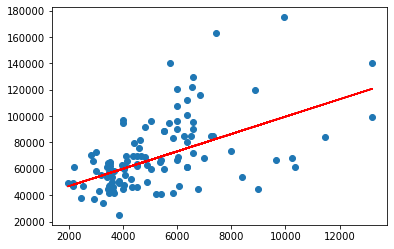

In [16]:
import matplotlib.pyplot as plt
plt.scatter(xtest,ytest)
plt.plot(xtest,ypred,color="red")
plt.show()

### Prediction of House Price for given lotsize

In [17]:
import numpy as np
xnew=np.array([5000]).reshape(1, -1)
slr.predict(xnew)

array([66652.69789229])

## Mulitple Linear Regression

### Determining X and Y Values for MLR

In [18]:
x=df[["lotsize","bathrms"]]
y=df.price

### Splitting of Train and Test

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)

### Building the Multiple linear Regression model

In [20]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(xtrain,ytrain)
print(mlr.coef_)
print(mlr.intercept_)

[5.44960793e+00 2.24254086e+04]
10559.055210013837


### Evaluation

In [21]:
ypred=mlr.predict(xtest)
from sklearn.metrics import mean_absolute_error,r2_score
r2_score(ytest,ypred)

0.44270381147590787

### Prediction of House Price for new data of lotsize and bathrms

In [22]:
xnew=np.array([5000,2]).reshape(1, -1)
mlr.predict(xnew)

array([82657.91198634])